In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl

### 1.) Import Libraries and Data

In [6]:
%matplotlib inline

In [7]:
path = r'C:\Users\dmlos\Achievement VI- Olist Business Analysis'

In [13]:
df = pd.read_csv(os.path.join(path, 'Olist-Original Data (Kaggle)', 'df_geolocation_customers_sellers_items_orders_clean_30.csv'))

In [14]:
df.shape

(116111, 30)

In [15]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Seller Zip,Seller Lat,Seller Lng,Customer Zip,Customer Lat,Customer Lng,Customer ID,Customer Unique ID,...,Freight Value,Payment Type,Review ID,Review Score,Order Status,Total Delivery Time (Min),Est.Total Delivery Time (Min),Purchase-to-Approval Time (Min),Order-to-Carrier Time (Min),Fulfillment Time
0,0,0,1041,-23.544392,-46.639499,7082,-23.434352,-46.542897,f3a2d5b49cc090c679649818bc3f8e8e,43926f36ab519f97f4c9ce01c6183c9c,...,9.57,credit_card,fa0564acf6469e703a848bccd7be6de9,5,delivered,2707.266667,33208.433333,27.683333,723.433333,Fast
1,1,1,1041,-23.544392,-46.639499,4718,-15.820763,-47.901087,b84999d47cecf126835a23650ee4ecb8,04efac4a29eec2c5662b65e87291ec38,...,19.15,credit_card,3322460564fc8f370b077b7e49d733ad,4,delivered,14353.433333,23275.033333,1128.650000,2314.033333,Average
2,2,2,1035,-23.541578,-46.641607,1525,-23.567009,-46.637529,3fc1728dbe8a2b9375d4b530b8932550,8910eb29996c4c8905499106240ad3f9,...,7.39,credit_card,1756f3a6e91c1cb546124d076b62fb14,5,delivered,2979.450000,20720.633333,18.083333,1129.633333,Fast
3,3,3,1035,-23.541578,-46.641607,1525,-23.567009,-46.637529,3fc1728dbe8a2b9375d4b530b8932550,8910eb29996c4c8905499106240ad3f9,...,7.39,credit_card,1756f3a6e91c1cb546124d076b62fb14,5,delivered,2979.450000,20720.633333,18.083333,1129.633333,Fast
4,4,4,1035,-23.541578,-46.641607,1525,-23.567009,-46.637529,3fc1728dbe8a2b9375d4b530b8932550,8910eb29996c4c8905499106240ad3f9,...,7.39,credit_card,1756f3a6e91c1cb546124d076b62fb14,5,delivered,2979.450000,20720.633333,18.083333,1129.633333,Fast


In [18]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Seller Zip', 'Seller Lat', 'Seller Lng',
       'Customer Zip', 'Customer Lat', 'Customer Lng', 'Customer ID',
       'Customer Unique ID', 'Customer City', 'Customer State', 'Seller ID',
       'Seller City', 'Seller State', 'Product ID', 'Product Category',
       'Product Weight(g)', 'Order ID', 'Price', 'Freight Value',
       'Payment Type', 'Review ID', 'Review Score', 'Order Status',
       'Total Delivery Time (Min)', 'Est.Total Delivery Time (Min)',
       'Purchase-to-Approval Time (Min)', 'Order-to-Carrier Time (Min)',
       'Fulfillment Time'],
      dtype='object')

In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116111 entries, 0 to 116110
Data columns (total 17 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0.1                     116111 non-null  int64  
 1   Unnamed: 0                       116111 non-null  int64  
 2   Seller Zip                       116111 non-null  int64  
 3   Seller Lat                       116111 non-null  float64
 4   Seller Lng                       116111 non-null  float64
 5   Customer Zip                     116111 non-null  int64  
 6   Customer Lat                     116111 non-null  float64
 7   Customer Lng                     116111 non-null  float64
 8   Product Weight(g)                116111 non-null  float64
 9   Price                            116111 non-null  float64
 10  Freight Value                    116111 non-null  float64
 11  Review Score                     116111 non-null  int64  
 12  To

In [143]:
df1 = df.drop(columns = ['Seller Zip','Seller Lat','Seller Lng','Customer Zip','Customer Lat','Customer Lng', 'Customer ID', 
                         'Customer Unique ID', 'Customer City', 'Customer State', 'Seller ID', 'Seller City',
                         'Seller State', 'Product ID', 'Product Category', 'Order ID', 'Payment Type', 'Review ID', 
                         'Order Status', 'Fulfillment Time', 'Product Weight(g)', 'Price', 'Freight Value', 'Review Score', 
                         'Est.Total Delivery Time (Min)', 'Purchase-to-Approval Time (Min)', 'Unnamed: 0.1', 'Unnamed: 0'])

In [144]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116111 entries, 0 to 116110
Data columns (total 2 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Total Delivery Time (Min)    116111 non-null  float64
 1   Order-to-Carrier Time (Min)  116111 non-null  float64
dtypes: float64(2)
memory usage: 1.8 MB


### 2.) Elbow Technique

In [145]:
#Begin by using the elbow technique to identify viable clusters
num_cl = range(1, 10) #define the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] #defines k-means clusters in the range we assigned above

In [146]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))]

In [147]:
score

[-19324706345305.816,
 -8681757558624.787,
 -5541680541828.305,
 -4161120223543.9805,
 -3431489582914.0703,
 -2833674922949.276,
 -2433692730810.618,
 -2078364471154.1365,
 -1815204801204.0825]

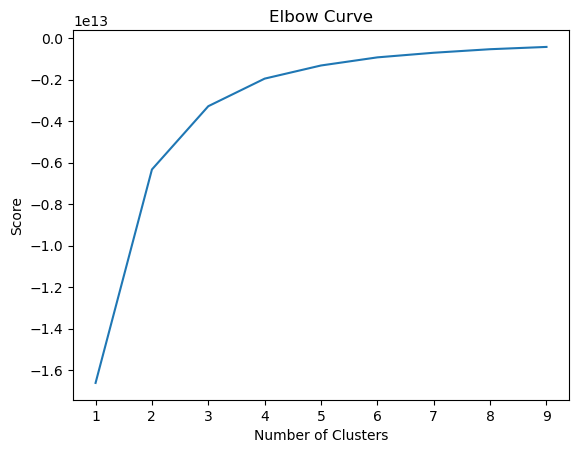

<Figure size 640x480 with 0 Axes>

In [276]:
#Now, let's plot the elobw curve using PyLab

pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()
plt.savefig('Elbow Curve- Total Delivery Time & Order-to-Carrier Time.png')

Now, we can actually perform the k-means algorithm to create our clusters. Based on the above elbow curve, the optimal number of clusters for our dataset is 3.

### 3.) K-Means Clustering

##### View the Clustering of Delivery Times and Order-to-Carrier Times 

In [149]:
#Create the K-Means Object

kmeans = KMeans(n_clusters=3)

In [150]:
#Fit the K-Means object to the data.

kmeans.fit(df1)

KMeans(n_clusters=3)

In [151]:
#Create a column in our dataframe depicting what cluster each observation is in

df1['clusters'] = kmeans.fit_predict(df1)

In [152]:
df1.head()

,Total Delivery Time (Min),Order-to-Carrier Time (Min),clusters
0,2707.266667,723.433333,1
1,14353.433333,2314.033333,1
2,2979.450000,1129.633333,1
3,2979.450000,1129.633333,1
4,2979.450000,1129.633333,1


In [153]:
df1

,Total Delivery Time (Min),Order-to-Carrier Time (Min),clusters
0,2707.266667,723.433333,1
1,14353.433333,2314.033333,1
2,2979.450000,1129.633333,1
3,2979.450000,1129.633333,1
4,2979.450000,1129.633333,1
...,...,...,...
116106,14380.666667,5158.916667,1
116107,10503.366667,6349.683333,1
116108,21248.666667,2316.666667,0
116109,13127.716667,4703.716667,1


In [154]:
df1['clusters'].value_counts()

1    70338
0    37669
2     8104
Name: clusters, dtype: int64

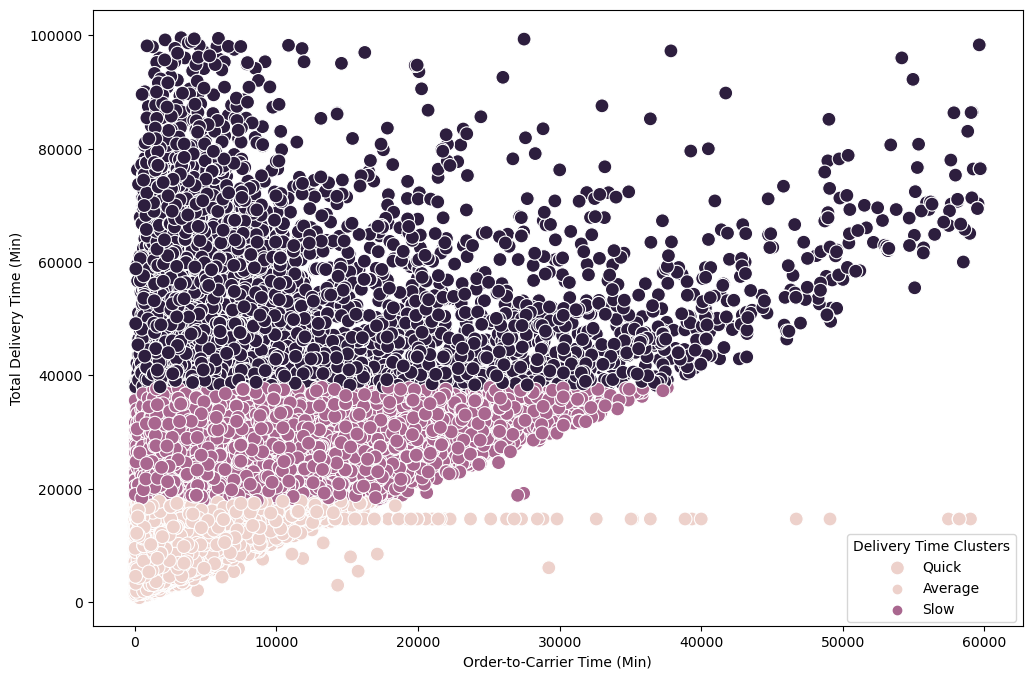

<Figure size 640x480 with 0 Axes>

In [277]:
# Plot the clusters for the "Delivery Time" and "Order-to-Carrier" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Order-to-Carrier Time (Min)'], y=df1['Total Delivery Time (Min)'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Order-to-Carrier Time (Min)')
plt.ylabel('Total Delivery Time (Min)')
legend_labels = ['Quick', 'Average', 'Slow']
plt.legend(legend_labels, title = 'Delivery Time Clusters', loc=1, bbox_to_anchor=(1.0,0.16))

plt.show()
plt.savefig('Delivery Time & Order-to-Carrier Clusters.png')

From the above clustering chart we can see that most orders are characterized as slow deliveries. While the total delivery times are pretty varied for shorter order-to-carrier lag times, they rapidly become longer as the order-to-carrier lag time increases. As the 2nd step in the fulfillment process after approval of the purchase, the effect of delays in getting the shipment to the carrier does have a pronounced effect on overall delivery times, especially once the gap between order and carrier grows larger!

In [ ]:
# Plot the clusters for the "Delivery Time" and "Order-to-Carrier" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Order-to-Carrier Time (Min)'], y=df1['Total Delivery Time (Min)'], hue=kmeans.labels_, s=100) 

ax[0].axhline(0, color='#afafaf', label=None)
ax[0].axvline(0, color='#afafaf', label=None)

ax[0].legend()
ax[0].set_title("Current output (with label = None)")


ax.grid(False)
plt.xlabel('Order-to-Carrier Time (Min)')
plt.ylabel('Total Delivery Time (Min)') 
plt.show()

##### Descriptive Statistics for the Clusters

In [246]:
df1.head()

,Total Delivery Time (Min),Order-to-Carrier Time (Min),clusters
0,2707.266667,723.433333,0
1,14353.433333,2314.033333,0
2,2979.450000,1129.633333,0
3,2979.450000,1129.633333,0
4,2979.450000,1129.633333,0


In [248]:
df1.loc[df1['clusters'] == 2, 'cluster'] = 'blue'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'green'
df1.loc[df1['clusters'] == 0, 'cluster'] = 'orange'

In [250]:
df1.groupby('clusters').agg({'Total Delivery Time (Min)':['mean', 'median'], 
                             'Order-to-Carrier Time (Min)':['mean', 'median']})

Total Delivery Time (Min)               Order-to-Carrier Time (Min)  \
                              mean        median                        mean   
clusters                                                                       
0                     10752.135259  10937.283333                 3390.672159   
1                     24942.285168  23626.583333                 6261.927991   
2                     50870.179383  47341.275000                 9788.538497   

                       
               median  
clusters               
0         2780.416667  
1         4722.283333  
2         5745.466667

This data would prove useful in the future for analyzing the major causes between slower overall delivery times. If one looks closely at the above clustering plot, you see among the "slow" cluster, two branches: one of long delivery times but short order-to-carrier times, which suggests the slowdown is due to other factors at play, and another concentration of equally long delivery times but long order-to-carrier times that forms along the diagonal of this chart, which suggests the lengthy delivery times are due, in large part, to the slow handoff from order to the carrier.

Again, this data will prove mroe insighgtful in a targeted investigation into the orders with slow delivery times, specifically looking for the causes behind those slow deliveries.

##### View the Clustering of Delivery Times and Review Scores

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116111 entries, 0 to 116110
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0.1                     116111 non-null  int64  
 1   Unnamed: 0                       116111 non-null  int64  
 2   Seller Zip                       116111 non-null  int64  
 3   Seller Lat                       116111 non-null  float64
 4   Seller Lng                       116111 non-null  float64
 5   Customer Zip                     116111 non-null  int64  
 6   Customer Lat                     116111 non-null  float64
 7   Customer Lng                     116111 non-null  float64
 8   Customer ID                      116111 non-null  object 
 9   Customer Unique ID               116111 non-null  object 
 10  Customer City                    116111 non-null  object 
 11  Customer State                   116111 non-null  object 
 12  Se

In [157]:
#Make a dataframe for Delivery Time and Review Score
df2 = df.drop(columns = ['Seller Zip','Seller Lat','Seller Lng','Customer Zip','Customer Lat','Customer Lng', 'Customer ID', 
                         'Customer Unique ID', 'Customer City', 'Customer State', 'Seller ID', 'Seller City',
                         'Seller State', 'Product ID', 'Product Category', 'Order ID', 'Payment Type', 'Review ID', 
                         'Order Status', 'Fulfillment Time', 'Product Weight(g)', 'Price', 'Freight Value', 
                         'Est.Total Delivery Time (Min)', 'Purchase-to-Approval Time (Min)', 'Unnamed: 0.1', 'Unnamed: 0', 'Payment Type',
                         'Order-to-Carrier Time (Min)'])

In [158]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116111 entries, 0 to 116110
Data columns (total 2 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Review Score               116111 non-null  int64  
 1   Total Delivery Time (Min)  116111 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.8 MB


In [159]:
#Begin by using the elbow technique to identify viable clusters
num_cl = range(1, 10) #define the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] #defines k-means clusters in the range we assigned above

In [160]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))]

In [161]:
score

[-16609374346436.541,
 -6331758214573.524,
 -3284984497565.9395,
 -1957364835913.0078,
 -1324355874187.662,
 -933688454641.7133,
 -711180212810.5631,
 -541038485843.5757,
 -430865223468.3755]

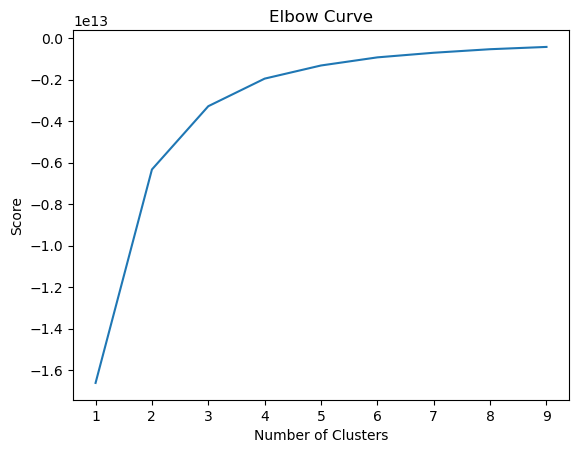

<Figure size 640x480 with 0 Axes>

In [278]:
#Now, let's plot the elobw curve using PyLab

pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()
plt.savefig('Elbow Curve- Delivery Time & Review Score Clusters.png')

In [164]:
#Create the K-Means Object

kmeans = KMeans(n_clusters=3)

In [165]:
#Fit the K-Means object to the data.

kmeans.fit(df2)

KMeans(n_clusters=3)

In [168]:
#Create a column in our dataframe depicting what cluster each observation is in

df2['clusters'] = kmeans.fit_predict(df2)

In [169]:
df2['clusters'].value_counts()

0    73328
2    35584
1     7199
Name: clusters, dtype: int64

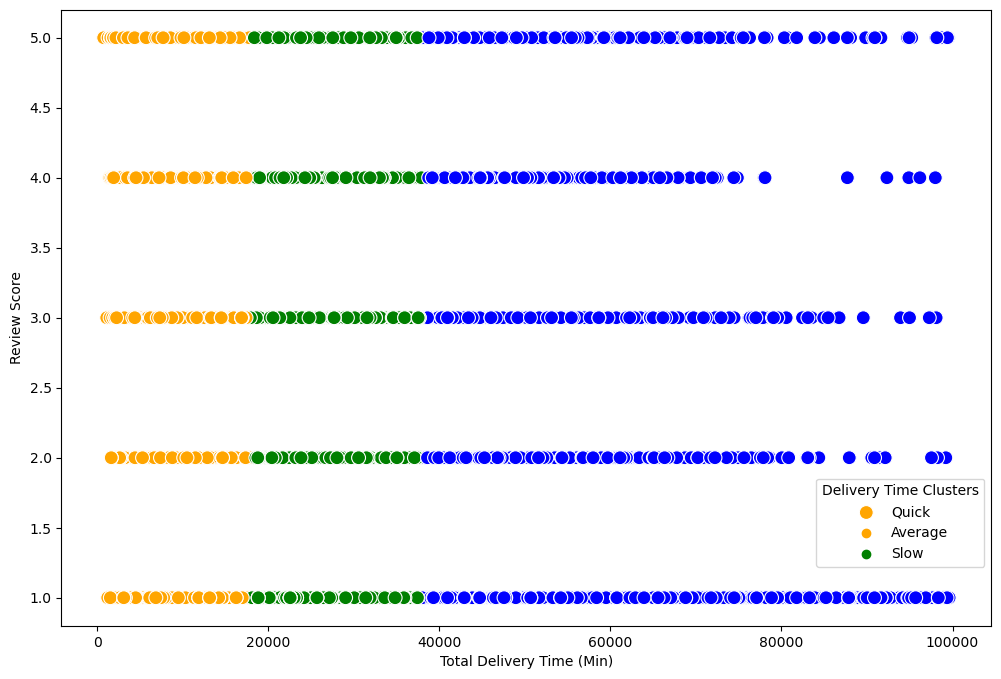

<Figure size 640x480 with 0 Axes>

In [279]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Total Delivery Time (Min)'], y=df2['Review Score'], hue=kmeans.labels_, s=100, palette=['orange', 'green', 'blue']) 

ax.grid(False)
plt.xlabel('Total Delivery Time (Min)')
plt.ylabel('Review Score')
legend_labels = ['Quick', 'Average', 'Slow']
plt.legend(labels = legend_labels, title = 'Delivery Time Clusters', loc=1, bbox_to_anchor=(1.0,0.25))
plt.show()
plt.savefig('Delivery Time & Review Score Clusters.png')

One of the main takeaways from the above clusters is that, by far, most of the orders are characterized by slow delivery times (i.e. 40,000 minutes, or 27 days, and above). This changes only somewhat amongst higher-rated orders, where there is less of a concentration of long-delivery times, though, there are still quite a few, proportionally.

This data probably won't be of much use to us in future investigations- there's simply not many strong trends that can be deciphered from this dataset.

##### Descriptive Statistics for the Clusters

In [238]:
df2.head()

,Review Score,Total Delivery Time (Min),clusters
0,5,2707.266667,0
1,4,14353.433333,0
2,5,2979.450000,0
3,5,2979.450000,0
4,5,2979.450000,0


In [242]:
df2.loc[df2['clusters'] == 2, 'cluster'] = 'blue'
df2.loc[df2['clusters'] == 1, 'cluster'] = 'green'
df2.loc[df2['clusters'] == 0, 'cluster'] = 'orange'

In [243]:
df2.groupby('clusters').agg({'Review Score':['mean', 'median'], 
                             'Total Delivery Time (Min)':['mean', 'median']})

Review Score        Total Delivery Time (Min)              
                 mean median                      mean        median
clusters                                                            
0            4.192982    5.0              10751.844563  10935.608333
1            2.547437    2.0              50868.381541  47339.083333
2            4.011353    5.0              24941.322952  23625.050000

In the slow cluster, the review score's low average relative to its median suggests that among long delivery orders, there is quite the bifurcation in reviews with over half being '5' and a large number being very low scores (probably many 1's and 2's). The delivery times are more evenly spread among this group, with a mean and median relatively close to each other (around 10.8k minutes). 

In the average cluster, the review score's high average relative to its median suggests that there is a significant concentration of average-speed orders with high customer satisfaction ratings (think 5's and 4's) while, at the same time, over half of such orders were given reviews of 2 or less, which is quite low. The delivery times have a bit of spread, with the average delivery time being almost 51k minutes while over half of "average" orders were faster than 47,339 minutes. This suggests that there must be a fair concentration of orders at the top-end of what is considered "average speed" for this cluster.

In the quick cluster, the review score's low average relative to its median suggests that among shorter delivery orders, there is quite the bifurcation in reviews with over half being '5' and a large number being very low scores (probably many 1's and 2's). That suggests that factors other than speed of delivery play a stronger role in the consumer ratings of quick deliveries. The relative closesness of the mean and median delivery times among the slow group means that there's a relatively even spread of delivery times among slower orders.

##### View the Clustering of Delivery Times and Prices 

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116111 entries, 0 to 116110
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0.1                     116111 non-null  int64  
 1   Unnamed: 0                       116111 non-null  int64  
 2   Seller Zip                       116111 non-null  int64  
 3   Seller Lat                       116111 non-null  float64
 4   Seller Lng                       116111 non-null  float64
 5   Customer Zip                     116111 non-null  int64  
 6   Customer Lat                     116111 non-null  float64
 7   Customer Lng                     116111 non-null  float64
 8   Customer ID                      116111 non-null  object 
 9   Customer Unique ID               116111 non-null  object 
 10  Customer City                    116111 non-null  object 
 11  Customer State                   116111 non-null  object 
 12  Se

In [173]:
#Make a dataframe for Delivery Time and Review Score
df3 = df.drop(columns = ['Seller Zip','Seller Lat','Seller Lng','Customer Zip','Customer Lat','Customer Lng', 'Customer ID', 
                         'Customer Unique ID', 'Customer City', 'Customer State', 'Seller ID', 'Seller City',
                         'Seller State', 'Product ID', 'Product Category', 'Order ID', 'Payment Type', 'Review ID', 
                         'Order Status', 'Fulfillment Time', 'Product Weight(g)', 'Freight Value', 'Est.Total Delivery Time (Min)', 
                         'Purchase-to-Approval Time (Min)', 'Unnamed: 0.1', 'Unnamed: 0', 'Payment Type', 'Order-to-Carrier Time (Min)'])

In [174]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116111 entries, 0 to 116110
Data columns (total 3 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Review Score               116111 non-null  int64  
 1   Total Delivery Time (Min)  116111 non-null  float64
 2   clusters                   116111 non-null  int32  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.2 MB


In [175]:
#Create the K-Means Object

kmeans = KMeans(n_clusters=3)

In [176]:
#Fit the K-Means object to the data.

kmeans.fit(df3)

KMeans(n_clusters=3)

In [206]:
#Create a column in our dataframe depicting what cluster each observation is in

df3['clusters'] = kmeans.fit_predict(df3)

In [207]:
df3['clusters'].value_counts()

0    73321
1    35588
2     7202
Name: clusters, dtype: int64

In [272]:
df3['Segment'] = df3['clusters'].map({0: 'Quick', 1: 'Average', 2: 'Slow'}) 

In [273]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116111 entries, 0 to 116110
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Price                      116111 non-null  float64
 1   Review Score               116111 non-null  int64  
 2   Total Delivery Time (Min)  116111 non-null  float64
 3   clusters                   116111 non-null  int32  
 4   Segment                    116111 non-null  object 
 5   cluster                    116111 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 4.9+ MB


In [274]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116111 entries, 0 to 116110
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Price                      116111 non-null  float64
 1   Review Score               116111 non-null  int64  
 2   Total Delivery Time (Min)  116111 non-null  float64
 3   clusters                   116111 non-null  int32  
 4   Segment                    116111 non-null  object 
 5   cluster                    116111 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 4.9+ MB


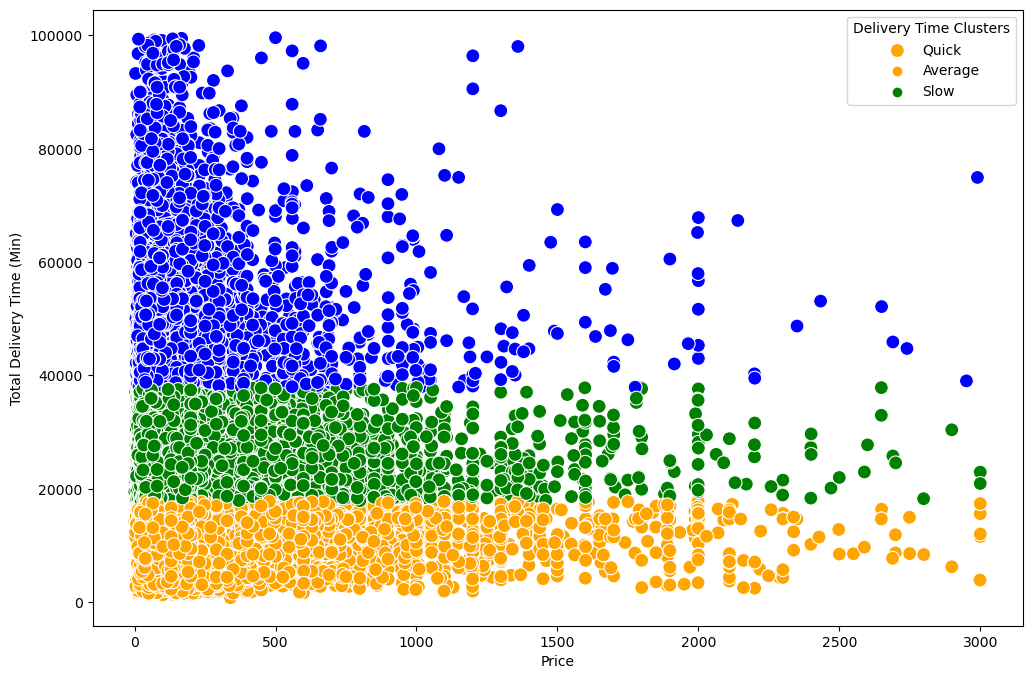

<Figure size 640x480 with 0 Axes>

In [280]:
# Plot the clusters for the "Delivery Time" and "Review Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df3['Price'], y=df3['Total Delivery Time (Min)'], hue=kmeans.labels_, s=100, palette=['orange', 'green', 'blue']) 

ax.grid(False)
plt.xlabel('Price')
plt.ylabel('Total Delivery Time (Min)') 

legend_labels = ['Quick', 'Average', 'Slow']
plt.legend(legend_labels, title = 'Delivery Time Clusters', loc=1, bbox_to_anchor=(1.0,1.0))

plt.show()
plt.savefig('Delivery Time & Price Clusters.png')

In the above we can see that most orders are characterized by quick (under 20,000 minutes or 14 days) and average delivery times. This chart shows that, at the lower price ranges, up to a price of 500, there's a consistent mix of quick, average, and slow delivery times among orders. Amongst the higher-price range items, the proportion of slow delivery times gradually decreases until most high-price orders consist of quick and average delivery times.

##### Descriptive Statistics for the Clusters

In [265]:
df3.head()

,Price,Review Score,Total Delivery Time (Min),clusters,Segment,cluster
0,329.99,5,2707.266667,0,Quick,orange
1,579.00,4,14353.433333,0,Quick,orange
2,17.86,5,2979.450000,0,Quick,orange
3,17.86,5,2979.450000,0,Quick,orange
4,17.86,5,2979.450000,0,Quick,orange


In [244]:
df3.loc[df3['clusters'] == 2, 'cluster'] = 'blue'
df3.loc[df3['clusters'] == 1, 'cluster'] = 'green'
df3.loc[df3['clusters'] == 0, 'cluster'] = 'orange'

In [245]:
df3.groupby('clusters').agg({'Price':['mean', 'median'], 
                           'Review Score':['mean', 'median'], 
                           'Total Delivery Time (Min)':['mean', 'median']})

Price        Review Score        Total Delivery Time (Min)  \
                mean median         mean median                      mean   
clusters                                                                    
0         113.050487  69.90     4.192960    5.0              10751.166335   
1         127.557986  79.98     4.011577    5.0              24938.834793   
2         146.660329  89.90     2.547348    2.0              50862.989903   

                        
                median  
clusters                
0         10934.216667  
1         23620.500000  
2         47332.458333

In the above cluster chart, most points are characterized as "quick delivery" and they have a relatively even spread on total delivery times (as do each of the clusters, really), as indicated by the closeness of the mean and median delivery time values. The spread between median and average prices in each cluster (quick, average, and slow) are indicative of top-heavy clustering of product prices in each group, with the "quick" cluster being the most top-heavy in terms of price distributions.

Of the longest deliveries, the vast majority are low-price items. This data could be useful in future examinations of low-price items in an effort to sell more volume. Another thing that could be good is to look at price to delivery time and freight value to delivery time calculations, so that we can know the differences in price per delivery time that customers are paying in different regions of the coutnry as well as in different product categories.